<img src='images/netflix-q.jpg'>

<h1>1. Business Problem </h1>

<h2> 1.1 Problem Description </h2>

<p>
Netflix is all about connecting people to the movies they love. To help customers find those movies, they developed world-class movie recommendation system: CinematchSM. Its job is to predict whether someone will enjoy a movie based on how much they liked or disliked other movies. Netflix use those predictions to make personal movie recommendations based on each customer’s unique tastes. And while <b>Cinematch</b> is doing pretty well, it can always be made better.
</p>
<p>Now there are a lot of interesting alternative approaches to how Cinematch works that netflix haven’t tried. Some are described in the literature, some aren’t. We’re curious whether any of these can beat Cinematch by making better predictions. Because, frankly, if there is a much better approach it could make a big difference to our customers and our business.</p>
<p> Credits: https://www.netflixprize.com/rules.html </p>

<h2> 1.2 Problem Statement </h2>

<p>
Netflix provided a lot of anonymous rating data, and a prediction accuracy bar that is 10% better than what Cinematch can do on the same training data set. (Accuracy is a measurement of how closely predicted ratings of movies match subsequent actual ratings.) 
</p>

<h2> 1.3 Sources </h2>

<ul>
<li> https://www.netflixprize.com/rules.html</li>
<li> https://www.kaggle.com/netflix-inc/netflix-prize-data</li>
<li> Netflix blog: https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429 (very nice blog)</li>
<li>surprise library: http://surpriselib.com/ (we use many models from this library)</li>
<li>surprise library doc: http://surprise.readthedocs.io/en/stable/getting_started.html (we use many models from this library)</li>
<li>installing surprise: https://github.com/NicolasHug/Surprise#installation </li>
<li> Research paper: http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf (most of our work was inspired by this paper)</li>
<li> SVD Decomposition : https://www.youtube.com/watch?v=P5mlg91as1c </li>
</ul>

<h2>1.4 Real world/Business Objectives and constraints  </h2>

Objectives:
1. Predict the rating that a user would give to a movie that he ahs not yet rated.
2. Minimize the difference between predicted and actual rating (RMSE and MAPE)
<br>

Constraints:
1. Some form of interpretability.

<h1> 2. Machine Learning Problem </h1>

<h2>2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> Get the data from : https://www.kaggle.com/netflix-inc/netflix-prize-data/data </p>
<p> Data files : 
<ul> 
<li> combined_data_1.txt </li>
<li> combined_data_2.txt </li>
<li> combined_data_3.txt </li>
<li> combined_data_4.txt </li>
<li> movie_titles.csv </li>
</ul>
<pre>  
The first line of each file [combined_data_1.txt, combined_data_2.txt, combined_data_3.txt, combined_data_4.txt] contains the movie id followed by a colon. Each subsequent line in the file corresponds to a rating from a customer and its date in the following format:

CustomerID,Rating,Date

MovieIDs range from 1 to 17770 sequentially.
CustomerIDs range from 1 to 2649429, with gaps. There are 480189 users.
Ratings are on a five star (integral) scale from 1 to 5.
Dates have the format YYYY-MM-DD.
</pre>

<h3> 2.1.2 Example Data point </h3>

<pre>
1:
1488844,3,2005-09-06
822109,5,2005-05-13
885013,4,2005-10-19
30878,4,2005-12-26
823519,3,2004-05-03
893988,3,2005-11-17
124105,4,2004-08-05
1248029,3,2004-04-22
1842128,4,2004-05-09
2238063,3,2005-05-11
1503895,4,2005-05-19
2207774,5,2005-06-06
2590061,3,2004-08-12
2442,3,2004-04-14
543865,4,2004-05-28
1209119,4,2004-03-23
804919,4,2004-06-10
1086807,3,2004-12-28
1711859,4,2005-05-08
372233,5,2005-11-23
1080361,3,2005-03-28
1245640,3,2005-12-19
558634,4,2004-12-14
2165002,4,2004-04-06
1181550,3,2004-02-01
1227322,4,2004-02-06
427928,4,2004-02-26
814701,5,2005-09-29
808731,4,2005-10-31
662870,5,2005-08-24
337541,5,2005-03-23
786312,3,2004-11-16
1133214,4,2004-03-07
1537427,4,2004-03-29
1209954,5,2005-05-09
2381599,3,2005-09-12
525356,2,2004-07-11
1910569,4,2004-04-12
2263586,4,2004-08-20
2421815,2,2004-02-26
1009622,1,2005-01-19
1481961,2,2005-05-24
401047,4,2005-06-03
2179073,3,2004-08-29
1434636,3,2004-05-01
93986,5,2005-10-06
1308744,5,2005-10-29
2647871,4,2005-12-30
1905581,5,2005-08-16
2508819,3,2004-05-18
1578279,1,2005-05-19
1159695,4,2005-02-15
2588432,3,2005-03-31
2423091,3,2005-09-12
470232,4,2004-04-08
2148699,2,2004-06-05
1342007,3,2004-07-16
466135,4,2004-07-13
2472440,3,2005-08-13
1283744,3,2004-04-17
1927580,4,2004-11-08
716874,5,2005-05-06
4326,4,2005-10-29
</pre>

<h2>2.2 Mapping the real world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<pre>
For a given movie and user we need to predict the rating would be given by him/her to the movie. 
The given problem is a Recommendation problem 
It can also seen as a Regression problem 
</pre>

<h3> 2.2.2 Performance metric </h3>

<ul>
<li> Mean Absolute Percentage Error: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error </li>
<li> Root Mean Square Error: https://en.wikipedia.org/wiki/Root-mean-square_deviation </li>
</ul>


<h3> 2.2.3 Machine Learning Objective and Constraints </h3>

1. Minimize RMSE.
2. Try to provide some interpretability.

In [1]:
# this is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime
globalstart = datetime.now()
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Preprocessing</h2> 

<h3>3.1.1 Converting / Merging whole data to required format: u_i, m_j, r_ij</h3>

In [8]:
start = datetime.now()
if not os.path.isfile('data1.csv'):
    # Create a file 'data.csv' before reading it
    # Read all the files in netflix and store them in one big file('data.csv')
    # We re reading from each of the four files and appendig each rating to a global file 'train.csv'
    data = open('data1.csv', mode='w')
    
    row = list()
    #files=['C:\\Users\\Lenovo\\Desktop\\notes\\netflix\\combined_data_1.txt','C:\\Users\\Lenovo\\Desktop\\notes\\netflix\\combined_data_2.txt', 
         #  'C:\\Users\\Lenovo\\Desktop\\notes\\netflix\\combined_data_3.txt', 'C:\\Users\\Lenovo\\Desktop\\notes\\netflix\\combined_data_4.txt']
    files=['C:\\Users\\Lenovo\\Desktop\\machinelearning\\notes\\netflix\\combined_data_1.txt']
    for file in files:
        print("Reading ratings from {}...".format(file))
        with open(file) as f:
            for line in f: 
                del row[:] # you don't have to do this.
                line = line.strip()
                if line.endswith(':'):
                    # All below are ratings for this movie, until another movie appears.
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    data.write(','.join(row))
                    data.write('\n')
        print("Done.\n")
    data.close()
print('Time taken :', datetime.now() - start)

Reading ratings from C:\Users\Lenovo\Desktop\machinelearning\notes\netflix\combined_data_1.txt...
Done.

Time taken : 0:05:26.869755


In [1]:
import pandas as pd
print("creating the dataframe from data1.csv file..")
df = pd.read_csv('data1.csv', sep=',', 
                       names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)
print('Done.\n')

# we are arranging the ratings according to time.
print('Sorting the dataframe by date..')
df.sort_values(by='date', inplace=True)
print('Done..')

creating the dataframe from data1.csv file..
Done.

Sorting the dataframe by date..
Done..


In [2]:
df.head()

,movie,user,rating,date
9056171,1798,510180,5,1999-11-11
14892677,2866,510180,3,1999-11-11
19585852,3730,510180,4,1999-11-11
20393918,3870,510180,2,1999-11-11
6901473,1367,510180,5,1999-11-11


In [3]:
df['movie'].value_counts()

1905    193941
2152    162597
3860    160454
4432    156183
571     154832
3938    153996
4306    151292
2452    149866
1962    145519
3962    140979
1145    140154
3624    139428
2372    137170
3427    136850
2782    135601
3106    135431
1220    134241
2862    128446
4123    121769
1307    121207
30      118413
3282    117270
457     116762
3151    116362
1542    114997
1428    113674
1798    113377
1865    110159
1180    108771
886     108606
         ...  
2799        65
3109        65
4457        64
2318        63
2367        62
149         62
2537        62
272         62
3328        62
1198        60
392         60
3853        60
1003        59
1591        59
1383        58
1445        58
2291        58
2744        58
3790        57
1416        55
1858        54
4035        52
3693        47
2805        46
820         45
4294        44
915         43
3656        42
4338        39
4362        36
Name: movie, Length: 4499, dtype: int64

In [4]:
df1 = df[0:50000].copy()

In [7]:
df1.to_csv('df1.csv')

In [10]:
df1['date'] = pd.to_datetime(df1['date'])

In [11]:
df1.head()

,movie,user,rating,date
9056171,1798,510180,5,1999-11-11
14892677,2866,510180,3,1999-11-11
19585852,3730,510180,4,1999-11-11
20393918,3870,510180,2,1999-11-11
6901473,1367,510180,5,1999-11-11


In [6]:
df1.head()

,movie,user,rating,date
9056171,1798,510180,5,1999-11-11
14892677,2866,510180,3,1999-11-11
19585852,3730,510180,4,1999-11-11
20393918,3870,510180,2,1999-11-11
6901473,1367,510180,5,1999-11-11


In [7]:
df1.shape

(50000, 4)

In [9]:
df2 = df1.pivot_table(values='rating',index='user',columns='movie')

In [34]:
df2.head()

movie,12,15,16,18,31,44,45,46,55,57,...,4402,4416,4421,4430,4438,4462,4474,4478,4494,4496
user,,,,,,,,,,,,,,,,,,,,,
544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df2.fillna(0,inplace=True)

In [33]:
user_sim = df2.dot(df2.T)

In [51]:
user_sim[544].sort_values(ascending=False)[1:6].index

Int64Index([2334863, 1865396, 968162, 1685089, 1312412], dtype='int64', name='user')

In [42]:
movie_sim = df2.T.dot(df2)

In [44]:
movie_sim[12].sort_values(ascending=False)

movie
2862    123.0
12      109.0
607     102.0
1542     90.0
1144     89.0
4393     85.0
3684     69.0
175      69.0
3148     68.0
4402     66.0
2252     58.0
1798     57.0
2001     57.0
4330     51.0
2395     51.0
4227     51.0
3379     51.0
2400     48.0
3605     48.0
295      46.0
985      46.0
3782     45.0
3798     45.0
3515     45.0
1367     44.0
3730     42.0
1770     42.0
2095     39.0
3742     39.0
2360     39.0
        ...  
2644      0.0
2641      0.0
2622      0.0
2611      0.0
2596      0.0
2783      0.0
2587      0.0
2584      0.0
2562      0.0
2547      0.0
2542      0.0
2539      0.0
2667      0.0
2673      0.0
2685      0.0
2695      0.0
2706      0.0
2708      0.0
2711      0.0
2712      0.0
2716      0.0
2728      0.0
2729      0.0
2747      0.0
2761      0.0
2763      0.0
2764      0.0
2773      0.0
2774      0.0
2311      0.0
Name: 12, Length: 716, dtype: float64

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
u_sim = pd.DataFrame(cosine_similarity(df2),columns=df2.index,index=df2.index)

In [50]:
u_sim[544].sort_values(ascending=False)[1:6].index

Int64Index([707873, 971999, 1230691, 545982, 1867699], dtype='int64', name='user')

In [52]:
m_sim = pd.DataFrame(cosine_similarity(df2.T),columns=df2.columns,index=df2.columns)

In [62]:
list (m_sim[12].sort_values(ascending=False)[:6].index)

[12, 372, 3515, 4321, 237, 1716]

In [59]:
movie_titles = pd.read_csv("movie_titles.csv", sep=',', header = None,
                           names=['movie_id', 'year_of_release', 'title'], verbose=True,
                      index_col = 'movie_id', encoding = "ISO-8859-1")


Tokenization took: 93.06 ms
Type conversion took: 32.02 ms
Parser memory cleanup took: 0.00 ms


In [73]:
df2.head()

movie,12,15,16,18,31,44,45,46,55,57,...,4402,4416,4421,4430,4438,4462,4474,4478,4494,4496
user,,,,,,,,,,,,,,,,,,,,,
544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
movie_titles.loc[list (m_sim[4430].sort_values(ascending=False)[:6].index)]

,year_of_release,title
movie_id,,
2428,1990.0,Shanghai
2501,1994.0,Lover of the Last Empress
4430,1996.0,Shanghai Grand
654,1975.0,Return of the Chinese Boxer
3660,1977.0,Iron Monkey
3202,1993.0,Bride with White Hair 2


In [55]:
m_sim.head()

movie,12,15,16,18,31,44,45,46,55,57,...,4402,4416,4421,4430,4438,4462,4474,4478,4494,4496
movie,,,,,,,,,,,,,,,,,,,,,
12,1.000000,0.000000,0.061971,0.040867,0.0,0.000000,0.028735,0.000000,0.032559,0.0,...,0.073617,0.0,0.0,0.0,0.037410,0.000000,0.000000,0.065746,0.000000,0.000000
15,0.000000,1.000000,0.000000,0.102914,0.0,0.000000,0.000000,0.077904,0.079715,0.0,...,0.017556,0.0,0.0,0.0,0.157014,0.301511,0.000000,0.000000,0.000000,0.146135
16,0.061971,0.000000,1.000000,0.111953,0.0,0.010807,0.000000,0.078941,0.224003,0.0,...,0.149433,0.0,0.0,0.0,0.224618,0.000000,0.065849,0.107501,0.000000,0.156792
18,0.040867,0.102914,0.111953,1.000000,0.0,0.115930,0.041244,0.180058,0.199823,0.0,...,0.182180,0.0,0.0,0.0,0.101835,0.085332,0.064370,0.210117,0.000000,0.141308
31,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.081706,0.000000,0.0,...,0.051556,0.0,0.0,0.0,0.000000,0.000000,0.011359,0.000000,0.488094,0.000000


In [5]:
df.describe()['rating']

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [6]:
df1 = df.sample(30000)

 <h3>3.1.4 Basic Statistics (#Ratings, #Users, and #Movies)</h3>

In [7]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df1.shape[0])
print("Total No of Users   :", len(np.unique(df1.user)))
print("Total No of movies  :", len(np.unique(df1.movie)))

Total data 
--------------------------------------------------

Total no of ratings : 30000
Total No of Users   : 27466
Total No of movies  : 5811


In [10]:
df1.columns = df.columns

In [12]:
df1.head()

,movie,user,rating,date
97734773,17307,349082,4,2005-04-06
86816948,15425,810224,5,2003-07-09
6372052,1245,843201,3,2002-01-05
53293244,9685,1336345,2,2003-11-22
41958501,7406,758937,3,2004-06-04


<h2>3.2 Spliting data into Train and Test(80:20) </h2>

In [16]:
if not os.path.isfile('train.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    df1.iloc[:int(df1.shape[0]*0.80)].to_csv("train.csv", index=False,columns = df.columns)

if not os.path.isfile('test.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    df1.iloc[int(df1.shape[0]*0.80):].to_csv("test.csv", index=False)



In [20]:
train_df = df1.iloc[:int(df1.shape[0]*0.80)]
test_df = df1.iloc[int(df1.shape[0]*0.80):]

In [21]:
train_df.shape

(24000, 4)

<h3>3.2.1 Basic Statistics in Train data (#Ratings, #Users, and #Movies)</h3>

In [22]:
# movies = train_df.movie.value_counts()
# users = train_df.user.value_counts()
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",train_df.shape[0])
print("Total No of Users   :", len(np.unique(train_df.user)))
print("Total No of movies  :", len(np.unique(train_df.movie)))

Training data 
--------------------------------------------------

Total no of ratings : 24000
Total No of Users   : 22327
Total No of movies  : 5303


<h3>3.2.2 Basic Statistics in Test data (#Ratings, #Users, and #Movies)</h3>

In [23]:
print("Test data ")
print("-"*50)
print("\nTotal no of ratings :",test_df.shape[0])
print("Total No of Users   :", len(np.unique(test_df.user)))
print("Total No of movies  :", len(np.unique(test_df.movie)))

Test data 
--------------------------------------------------

Total no of ratings : 6000
Total No of Users   : 5891
Total No of movies  : 2585


 <h2> 3.3 Exploratory Data Analysis on Train data </h2>

In [24]:
# method to make y-axis more readable
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

<h3> 3.3.1 Distribution of ratings </h3>

<IPython.core.display.Javascript object>


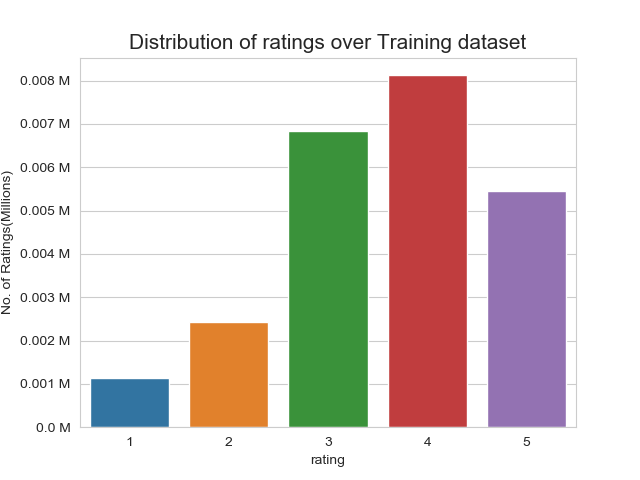

In [25]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings over Training dataset', fontsize=15)
sns.countplot(train_df.rating)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

<p style="font-size:13px"> <b>Add new column (week day) to the data set  for analysis.</b></p>

In [26]:
# It is used to skip the warning ''SettingWithCopyWarning''.. 
pd.options.mode.chained_assignment = None  # default='warn'

train_df['day_of_week'] = train_df.date.dt.weekday_name

train_df.tail()

,movie,user,rating,date,day_of_week
79026521,14313,1973320,3,2005-09-15,Thursday
22551339,4266,61839,4,2005-10-25,Tuesday
57501843,10493,163650,4,2005-09-01,Thursday
89506212,15901,1723621,3,2005-08-17,Wednesday
47946751,8644,2278132,5,2003-08-22,Friday


<h3> 3.3.2 Number of Ratings per a month </h3>

<IPython.core.display.Javascript object>


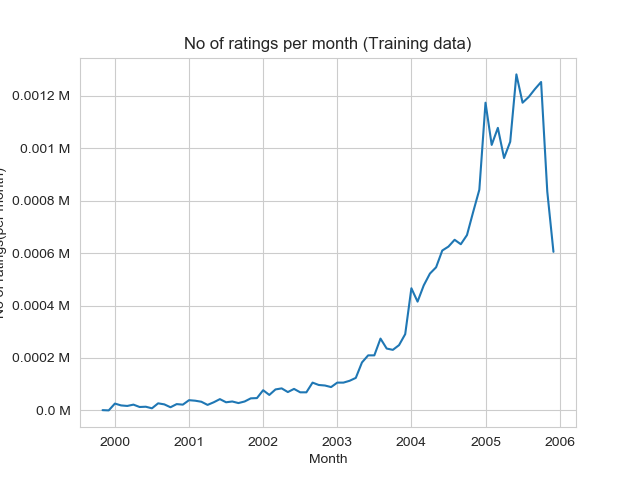

In [27]:
ax = train_df.resample('m', on='date')['rating'].count().plot()
ax.set_title('No of ratings per month (Training data)')
plt.xlabel('Month')
plt.ylabel('No of ratings(per month)')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

<h3> 3.3.3 Analysis on the Ratings given by user </h3>

In [28]:
no_of_rated_movies_per_user = train_df.groupby(by='user')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

user
1461435    6
320314     5
2520506    5
322064     5
387418     5
Name: rating, dtype: int64

In [30]:
no_of_rated_movies_per_user.describe()

count    22327.000000
mean         1.074932
std          0.296720
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: rating, dtype: float64

> _There,  is something interesting going on with the quantiles.._

In [31]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<IPython.core.display.Javascript object>


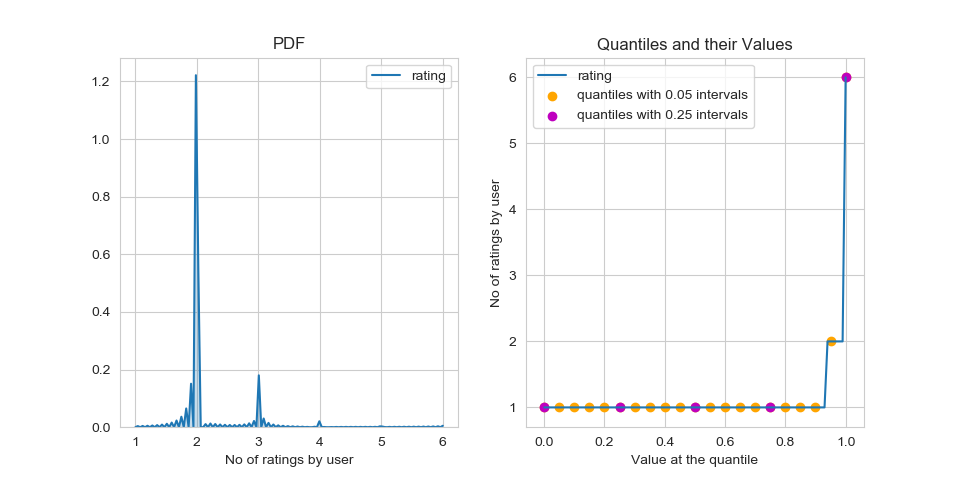

In [32]:
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

# annotate the 25th, 50th, 75th and 100th percentile values....
for x,y in zip(quantiles.index[::25], quantiles[::25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500)
                ,fontweight='bold')


plt.show()

In [33]:
quantiles[::5]

0.00    1
0.05    1
0.10    1
0.15    1
0.20    1
0.25    1
0.30    1
0.35    1
0.40    1
0.45    1
0.50    1
0.55    1
0.60    1
0.65    1
0.70    1
0.75    1
0.80    1
0.85    1
0.90    1
0.95    2
1.00    6
Name: rating, dtype: int64

__how many ratings at the last 5% of all ratings__??

In [34]:
print('\n No of ratings at last 5 percentile : {}\n'.format(sum(no_of_rated_movies_per_user>= 749)) )


 No of ratings at last 5 percentile : 0



<h3> 3.3.4 Analysis of ratings of a movie given by a user </h3>

<IPython.core.display.Javascript object>


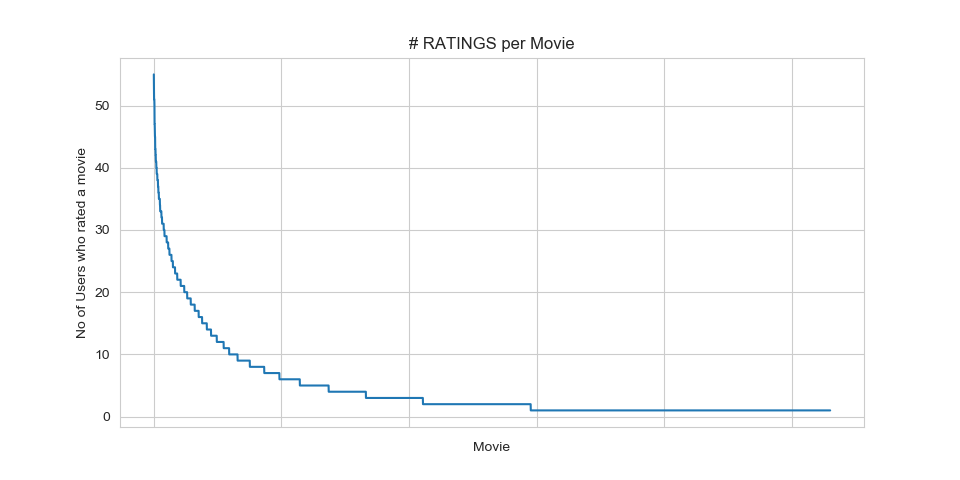

In [35]:
no_of_ratings_per_movie = train_df.groupby(by='movie')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()

- __It is very skewed.. just like nunmber of ratings given per user.__
    
    
    - There are some movies (which are very popular) which are rated by huge number of users.
    
    - But most of the movies(like 90%) got some hundereds of ratings.

<h3> 3.3.5 Number of ratings on each day of the week</h3>

<IPython.core.display.Javascript object>


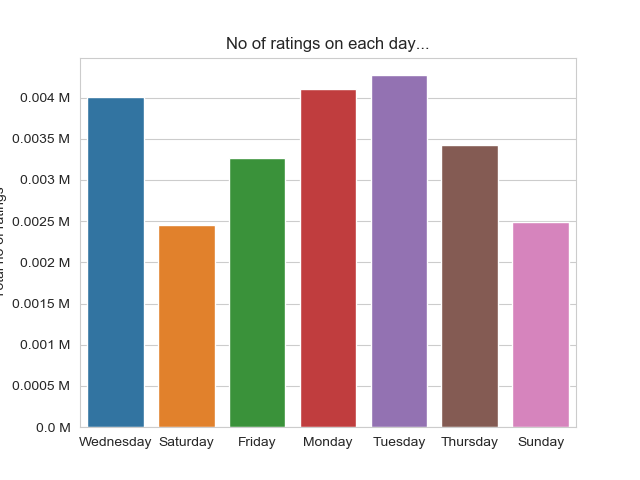

In [36]:
fig, ax = plt.subplots()
sns.countplot(x='day_of_week', data=train_df, ax=ax)
plt.title('No of ratings on each day...')
plt.ylabel('Total no of ratings')
plt.xlabel('')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

<IPython.core.display.Javascript object>


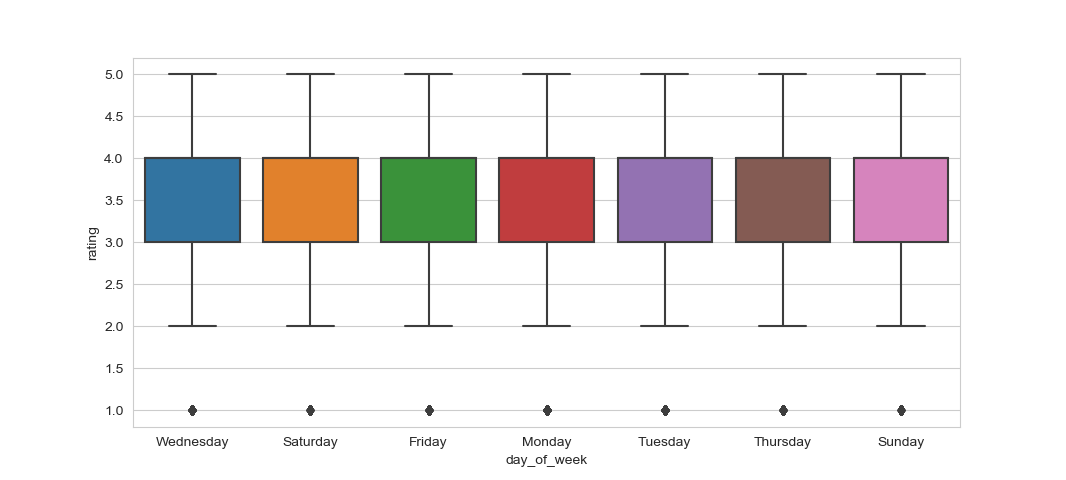

0:00:00.397261


In [37]:
start = datetime.now()
fig = plt.figure(figsize=plt.figaspect(.45))
sns.boxplot(y='rating', x='day_of_week', data=train_df)
plt.show()
print(datetime.now() - start)

In [38]:
avg_week_df = train_df.groupby(by=['day_of_week'])['rating'].mean()
print(" AVerage ratings")
print("-"*30)
print(avg_week_df)
print("\n")

 AVerage ratings
------------------------------
day_of_week
Friday       3.596567
Monday       3.584226
Saturday     3.606939
Sunday       3.606755
Thursday     3.569465
Tuesday      3.605479
Wednesday    3.614789
Name: rating, dtype: float64




<h3> 3.3.6 Creating sparse matrix from data frame </h3>

<table>
<tr>
<td>
<img src='images/data_c.jpg' width='250px' align=left/>
</td>
<td>
<img src='images/arrow.jpg' width='60px' align=left/>
</td>
<td>
<img src='images/data_sparse_c.jpg' width='400px' align=left/>
</td>
</tr>
</table>

<h4> 3.3.6.1 Creating sparse matrix from train data frame </h4>

In [3]:
start = datetime.now()
if os.path.isfile('train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    train_sparse_matrix = sparse.load_npz('train_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    train_sparse_matrix = sparse.csr_matrix((train_df.rating.values, (train_df.user.values,
                                               train_df.movie.values)),)
    
    print('Done. It\'s shape is : (user, movie) : ',train_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("train_sparse_matrix.npz", train_sparse_matrix)
    print('Done..\n')

print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.267192


In [8]:
train_sparse_matrix.shape

(2649286, 17770)

In [16]:
c = train_sparse_matrix*train_sparse_matrix.T

In [17]:
c.shape

(2649286, 2649286)

In [13]:
d = train_sparse_matrix.T*train_sparse_matrix

In [14]:
d.shape

(17770, 17770)

<p><b>The Sparsity of Train Sparse Matrix</b></p>

In [5]:
us,mv = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()

print("Sparsity Of Train matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Train matrix : 99.99994902057068 % 


<h4> 3.3.6.2 Creating sparse matrix from test data frame </h4>

In [6]:
start = datetime.now()
if os.path.isfile('test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    test_sparse_matrix = sparse.load_npz('test_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    test_sparse_matrix = sparse.csr_matrix((test_df.rating.values, (test_df.user.values,
                                               test_df.movie.values)))
    
    print('Done. It\'s shape is : (user, movie) : ',test_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("test_sparse_matrix.npz", test_sparse_matrix)
    print('Done..\n')
    
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.359255


<p><b>The Sparsity of Test data Matrix</b></p>

In [42]:
us,mv = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

print("Sparsity Of Test matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Test matrix : 99.99998725203197 % 


<h3>3.3.7 Finding Global average of all movie ratings, Average rating per user, and Average rating per movie</h3>

In [7]:
# get the user averages in dictionary (key: user_id/movie_id, value: avg rating)

def get_average_ratings(sparse_matrix, of_users):
    
    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes

    # ".A1" is for converting Column_Matrix to 1-D numpy array 
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that movie or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR movie..
    no_of_ratings = is_rated.sum(axis=ax).A1
    
    # max_user  and max_movie ids in sparse matrix 
    u,m = sparse_matrix.shape
    # creae a dictonary of users and their average ratigns..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m) 
                                    if no_of_ratings[i] !=0}

    # return that dictionary of average ratings
    return average_ratings

<h4> 3.3.7.1 finding global average of all movie ratings </h4>

In [8]:
train_averages = dict()
# get the global average of ratings in our train set.
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

{'global': 3.5973333333333333}

<h4> 3.3.7.2 finding average rating per user</h4>

In [9]:
train_averages['user'] = get_average_ratings(train_sparse_matrix, of_users=True)
print('\nAverage rating of user 1441794 :',train_averages['user'][1441794])


Average rating of user 1441794 : 3.0


<h4> 3.3.7.3 finding average rating per movie</h4>

In [10]:
train_averages['movie'] =  get_average_ratings(train_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 2 :',train_averages['movie'][2])


 AVerage rating of movie 2 : 5.0


<h4> 3.3.7.4 PDF's & CDF's of Avg.Ratings of Users & Movies (In Train Data)</h4>

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


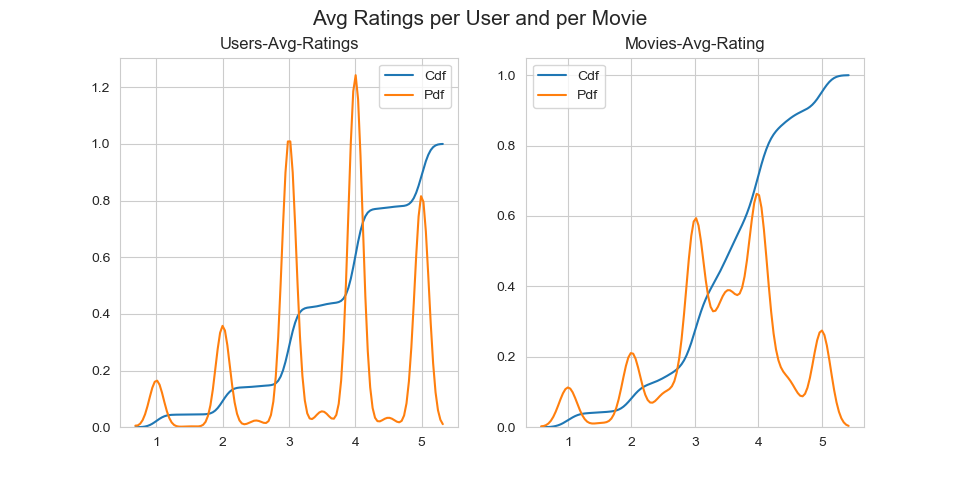

0:00:05.266318


In [56]:
start = datetime.now()
# draw pdfs for average rating per user and average
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=15)

ax1.set_title('Users-Avg-Ratings')
# get the list of average user ratings from the averages dictionary..
user_averages = [rat for rat in train_averages['user'].values()]
sns.distplot(user_averages, ax=ax1, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(user_averages, ax=ax1, hist=False,label='Pdf')

ax2.set_title('Movies-Avg-Rating')
# get the list of movie_average_ratings from the dictionary..
movie_averages = [rat for rat in train_averages['movie'].values()]
sns.distplot(movie_averages, ax=ax2, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(movie_averages, ax=ax2, hist=False, label='Pdf')

plt.show()
print(datetime.now() - start)

<h3> 3.3.8 Cold Start problem </h3>

<h4> 3.3.8.1 Cold Start problem with Users</h4>

In [58]:
total_users = len(np.unique(df1.user))
users_train = len(train_averages['user'])
new_users = total_users - users_train

print('\nTotal number of Users  :', total_users)
print('\nNumber of Users in Train data :', users_train)
print("\nNo of Users that didn't appear in train data: {}({} %) \n ".format(new_users,
                                                                        np.round((new_users/total_users)*100, 2)))


Total number of Users  : 27466

Number of Users in Train data : 22327

No of Users that didn't appear in train data: 5139(18.71 %) 
 


> We might have to handle __new users__ ( ___75148___ ) who didn't appear in train data.

<h4> 3.3.8.2 Cold Start problem with Movies</h4>

In [59]:
total_movies = len(np.unique(df1.movie))
movies_train = len(train_averages['movie'])
new_movies = total_movies - movies_train

print('\nTotal number of Movies  :', total_movies)
print('\nNumber of Users in Train data :', movies_train)
print("\nNo of Movies that didn't appear in train data: {}({} %) \n ".format(new_movies,
                                                                        np.round((new_movies/total_movies)*100, 2)))


Total number of Movies  : 5811

Number of Users in Train data : 5303

No of Movies that didn't appear in train data: 508(8.74 %) 
 


> We might have to handle __346 movies__ (small comparatively) in test data

<h2> 3.4 Computing Similarity matrices </h2>

<h3> 3.4.1 Computing User-User Similarity matrix </h3>

1. Calculating User User Similarity_Matrix is __not very easy__(_unless you have huge Computing Power and lots of time_) because of number of. usersbeing lare.

    * You can try if you want to. Your system could crash or the program stops with **Memory Error**


<h4> 3.4.1.1 Trying with all dimensions (17k dimensions per user) </h4>

In [11]:
from sklearn.metrics.pairwise import cosine_similarity


def compute_user_similarity(sparse_matrix, compute_for_few=False, top = 100, verbose=False, verb_for_n_rows = 20,
                            draw_time_taken=True):
    no_of_users, _ = sparse_matrix.shape
    # get the indices of  non zero rows(users) from our sparse matrix
    row_ind, col_ind = sparse_matrix.nonzero()
    row_ind = sorted(set(row_ind)) # we don't have to
    time_taken = list() #  time taken for finding similar users for an user..
    
    # we create rows, cols, and data lists.., which can be used to create sparse matrices
    rows, cols, data = list(), list(), list()
    if verbose: print("Computing top",top,"similarities for each user..")
    
    start = datetime.now()
    temp = 0
    
    for row in row_ind[:top] if compute_for_few else row_ind:
        temp = temp+1
        prev = datetime.now()
        
        # get the similarity row for this user with all other users
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()
        # We will get only the top ''top'' most similar users and ignore rest of them..
        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]
        
        # add them to our rows, cols and data
        rows.extend([row]*top)
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)
        time_taken.append(datetime.now().timestamp() - prev.timestamp())
        if verbose:
            if temp%verb_for_n_rows == 0:
                print("computing done for {} users [  time elapsed : {}  ]"
                      .format(temp, datetime.now()-start))
            
        
    # lets create sparse matrix out of these and return it
    if verbose: print('Creating Sparse matrix from the computed similarities')
    #return rows, cols, data
    
    if draw_time_taken:
        plt.plot(time_taken, label = 'time taken for each user')
        plt.plot(np.cumsum(time_taken), label='Total time')
        plt.legend(loc='best')
        plt.xlabel('User')
        plt.ylabel('Time (seconds)')
        plt.show()
        
    return sparse.csr_matrix((data, (rows, cols)), shape=(no_of_users, no_of_users)), time_taken      

Computing top 100 similarities for each user..
computing done for 20 users [  time elapsed : 0:00:08.739543  ]
computing done for 40 users [  time elapsed : 0:00:17.840990  ]
computing done for 60 users [  time elapsed : 0:00:26.978145  ]
computing done for 80 users [  time elapsed : 0:00:34.577533  ]
computing done for 100 users [  time elapsed : 0:00:42.127886  ]
Creating Sparse matrix from the computed similarities


<IPython.core.display.Javascript object>


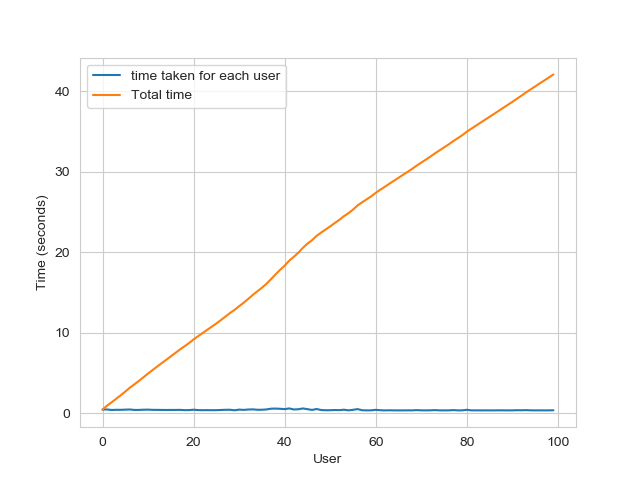

----------------------------------------------------------------------------------------------------
Time taken : 0:00:42.502674


In [12]:
start = datetime.now()
u_u_sim_sparse, _ = compute_user_similarity(train_sparse_matrix, compute_for_few=True, top = 100,
                                                     verbose=True)
print("-"*100)
print("Time taken :",datetime.now()-start)

__Is there any other way to compute user user similarity..??__

-An alternative is to compute similar users for a particular user,  whenenver required (**ie., Run time**)
    - We maintain a binary Vector for users, which tells us whether we already computed or not..
    - ***If not*** : 
        - Compute top (let's just say, 1000) most similar users for this given user, and add this to our datastructure, so that we can just access it(similar users) without recomputing it again.
        - 
    - ***If It is already Computed***:
        - Just get it directly from our datastructure, which has that information.
        - In production time, We might have to recompute similarities, if it is computed a long time ago. Because user preferences changes over time. If we could maintain some kind of Timer, which when expires, we have to update it ( recompute it ). 
        - 
    - ***Which datastructure to use:***
        - It is purely implementation dependant. 
        - One simple method is to maintain a **Dictionary Of Dictionaries**.
            - 
            - **key    :** _userid_ 
            - __value__: _Again a dictionary_
                - __key__  : _Similar User_
                - __value__: _Similarity Value_

In [13]:
u_u_sim_sparse.shape

(2649286, 2649286)

<h3> 3.4.2 Computing Movie-Movie Similarity matrix </h3>

In [14]:
start = datetime.now()
if not os.path.isfile('m_m_sim_sparse.npz'):
    print("It seems you don't have that file. Computing movie_movie similarity...")
    start = datetime.now()
    m_m_sim_sparse = cosine_similarity(X=train_sparse_matrix.T, dense_output=False)
    print("Done..")
    # store this sparse matrix in disk before using it. For future purposes.
    print("Saving it to disk without the need of re-computing it again.. ")
    sparse.save_npz("m_m_sim_sparse.npz", m_m_sim_sparse)
    print("Done..")
else:
    print("It is there, We will get it.")
    m_m_sim_sparse = sparse.load_npz("m_m_sim_sparse.npz")
    print("Done ...")

print("It's a ",m_m_sim_sparse.shape," dimensional matrix")

print(datetime.now() - start)

It is there, We will get it.
Done ...
It's a  (17770, 17770)  dimensional matrix
0:00:00.136102


In [15]:
m_m_sim_sparse.shape

(17770, 17770)

- Even though we have similarity measure of each movie, with all other movies, We generally don't care much about least similar movies.


- Most of the times, only top_xxx similar items matters. It may be 10 or 100.


- We take only those top similar movie ratings and store them  in a saperate dictionary.

In [64]:
movie_ids = np.unique(m_m_sim_sparse.nonzero()[1])

In [65]:
start = datetime.now()
similar_movies = dict()
for movie in movie_ids:
    # get the top similar movies and store them in the dictionary
    sim_movies = m_m_sim_sparse[movie].toarray().ravel().argsort()[::-1][1:]
    similar_movies[movie] = sim_movies[:100]
print(datetime.now() - start)

# just testing similar movies for movie_15
similar_movies[2]

0:00:07.555998


array([17769,  5925,  5919,  5920,  5921,  5922,  5923,  5924,  5926,
        5917,  5927,  5928,  5929,  5930,  5931,  5932,  5918,  5916,
        5934,  5915,  5914,  5913,  5912,  5911,  5910,  5909,  5908,
        5907,  5906,  5905,  5904,  5903,  5902,  5933,  5935,  5900,
        5960,  5954,  5955,  5956,  5957,  5958,  5959,  5961,  5936,
        5962,  5963,  5964,  5965,  5966,  5967,  5953,  5952,  5951,
        5950,  5949,  5948,  5947,  5946,  5945,  5944,  5943,  5942,
        5941,  5940,  5939,  5938,  5937,  5901,  5899,  5969,  5856,
        5850,  5851,  5852,  5853,  5854,  5855,  5857,  5898,  5858,
        5859,  5860,  5861,  5862,  5863,  5849,  5848,  5847,  5846,
        5845,  5844,  5843,  5842,  5841,  5840,  5839,  5838,  5837,
        5836], dtype=int64)

<h3> 3.4.3 Finding most similar movies using similarity matrix </h3>

__ Does Similarity really works as the way we expected...? __ <br>
_Let's pick some random movie and check for its similar movies...._

In [66]:
# First Let's load the movie details into soe dataframe..
# movie details are in 'netflix/movie_titles.csv'
import pandas as pd
movie_titles = pd.read_csv("C:/Users/Lenovo/Desktop/notes/movie_titles.csv", sep=',', header = None,
                           names=['movie_id', 'year_of_release', 'title'], verbose=True,
                      index_col = 'movie_id', encoding = "ISO-8859-1")

movie_titles.head()

Tokenization took: 84.07 ms
Type conversion took: 87.07 ms
Parser memory cleanup took: 0.00 ms


,year_of_release,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [67]:
movie_titles.shape

(17770, 2)

In [68]:
start = datetime.now()
if not os.path.isfile('m_m_sim_sparse.npz'):
    print("It seems you don't have that file. Computing movie_movie similarity...")
    start = datetime.now()
    m_m_sim_sparse = cosine_similarity(X=train_sparse_matrix.T, dense_output=False)
    print("Done..")
    # store this sparse matrix in disk before using it. For future purposes.
    print("Saving it to disk without the need of re-computing it again.. ")
    sparse.save_npz("m_m_sim_sparse.npz", m_m_sim_sparse)
    print("Done..")
else:
    print("It is there, We will get it.")
    m_m_sim_sparse = sparse.load_npz("m_m_sim_sparse.npz")
    print("Done ...")

print("It's a ",m_m_sim_sparse.shape," dimensional matrix")

print(datetime.now() - start)

It is there, We will get it.
Done ...
It's a  (17770, 17770)  dimensional matrix
0:00:00.025022


In [5]:
train_sparse_matrix = sparse.load_npz("train_sparse_matrix.npz")

In [6]:
test_sparse_matrix = sparse.load_npz("test_sparse_matrix.npz")

<p style='font-size:15px'><b>Similar Movies for 'Vampire Journals'</b></p>

In [76]:
mv_id = 16

print("\nMovie ----->",movie_titles.loc[mv_id].values[1])

print("\nIt has {} Ratings from users.".format(train_sparse_matrix[:,mv_id].getnnz()))

print("\nWe have {} movies which are similarto this  and we will get only top most..".format(m_m_sim_sparse[:,mv_id].getnnz()))


Movie -----> Screamers

It has 1 Ratings from users.

We have 1 movies which are similarto this  and we will get only top most..


In [77]:
similarities = m_m_sim_sparse[mv_id].toarray().ravel()

similar_indices = similarities.argsort()[::-1][1:]

similarities[similar_indices]

sim_indices = similarities.argsort()[::-1][1:] # It will sort and reverse the array and ignore its similarity (ie.,1)
                                               # and return its indices(movie_ids)

<IPython.core.display.Javascript object>


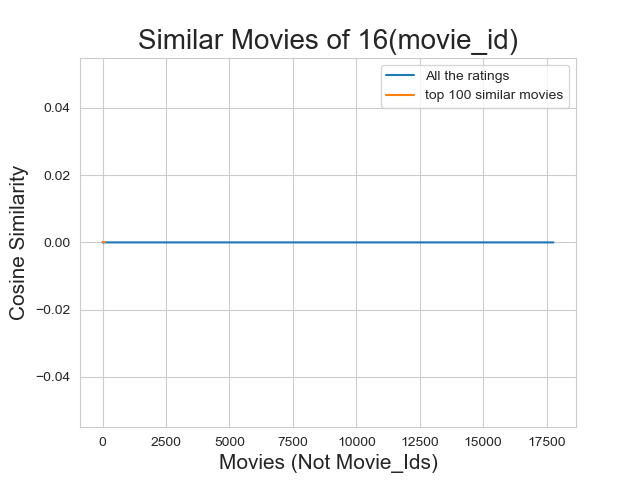

In [78]:
plt.plot(similarities[sim_indices], label='All the ratings')
plt.plot(similarities[sim_indices[:100]], label='top 100 similar movies')
plt.title("Similar Movies of {}(movie_id)".format(mv_id), fontsize=20)
plt.xlabel("Movies (Not Movie_Ids)", fontsize=15)
plt.ylabel("Cosine Similarity",fontsize=15)
plt.legend()
plt.show()

__Top 10 similar movies__

In [79]:
movie_titles.loc[sim_indices[:10]]

,year_of_release,title
movie_id,,
5925,1984.0,C.H.U.D.
5919,1984.0,V: The Final Battle
5920,1981.0,Eyewitness
5921,2004.0,Genesis: Live at Wembley Stadium
5922,1987.0,Stand and Deliver
5923,1997.0,Gabbeh
5924,2000.0,Snatch
5926,1999.0,Fight Club
5917,1980.0,Tinker


 > Similarly, we can ___find similar users___ and compare how similar they are. 

 <h1> 4.  Machine Learning Models </h1>

<img src='images/models.jpg' width=500px>

<h2>4.2 Finding Global Average of all movie ratings, Average rating per User, and Average rating per Movie (from sampled train)</h2>

In [10]:
sample_train_averages = dict()

<h3>4.2.1 Finding Global Average of all movie ratings</h3>

In [11]:
# get the global average of ratings in our train set.
global_average = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
sample_train_averages['global'] = global_average
sample_train_averages

{'global': 3.5875813607223455}

<h3>4.2.2 Finding Average rating per User</h3>

In [14]:
sample_train_averages['user'] = get_average_ratings(sample_train_sparse_matrix, of_users=True)
print('\nAverage rating of user 1515220 :',sample_train_averages['user'][1515220])


Average rating of user 1515220 : 3.923076923076923


<h3>4.2.3 Finding Average rating per Movie</h3>

In [15]:
sample_train_averages['movie'] =  get_average_ratings(sample_train_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 15153 :',sample_train_averages['movie'][15153])


 AVerage rating of movie 15153 : 2.752


<h2> 4.3 Featurizing data </h2>

In [80]:
print('\n No of ratings in Our Sampled train matrix is : {}\n'.format(train_sparse_matrix.count_nonzero()))
print('\n No of ratings in Our Sampled test  matrix is : {}\n'.format(test_sparse_matrix.count_nonzero()))


 No of ratings in Our Sampled train matrix is : 24000


 No of ratings in Our Sampled test  matrix is : 6000



<h3> 4.3.1 Featurizing data for regression problem </h3>

<h4> 4.3.1.1 Featurizing train data </h4>

In [16]:
# get users, movies and ratings from our samples train sparse matrix
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(train_sparse_matrix)

In [17]:
sample_train_users.shape

(24000,)

In [18]:
u_u_sim_sparse[2]

<1x2649286 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [22]:
############################################################
# It took me almost 10 hours to prepare this train dataset.#
############################################################
start = datetime.now()
if os.path.isfile('reg_train.csv'):
    print("File already exists you don't have to prepare again..." )
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
    with open('reg_train.csv', mode='w') as reg_data_file:
        count = 0
        for (user, movie, rating)  in zip(sample_train_users, sample_train_movies, sample_train_ratings):
            st = datetime.now()
        #     print(user, movie)    
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(train_sparse_matrix[user], train_sparse_matrix).ravel()
            #user_sim = u_u_sim_sparse[user]
            top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar users for this movie
            top_ratings = train_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
        #     print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(train_sparse_matrix[:,movie].T,train_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = train_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
        #     print(top_sim_movies_ratings, end=" : -- ")

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(user)
            row.append(movie)
            # Now add the other features to this data...
            row.append(train_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(train_averages['user'][user])
            # Avg_movie rating
            row.append(train_averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%3000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))


print(datetime.now() - start)

preparing 24000 tuples for the dataset..

Done for 3000 rows----- 0:46:04.496400
Done for 6000 rows----- 1:31:03.730752
Done for 9000 rows----- 2:17:27.288859
Done for 12000 rows----- 3:03:21.900982
Done for 15000 rows----- 3:48:35.959158
Done for 18000 rows----- 4:33:48.544326
Done for 21000 rows----- 5:18:59.300830
Done for 24000 rows----- 6:04:09.045038
6:04:09.048043


__Reading from the file to make a Train_dataframe__

In [2]:
reg_train = pd.read_csv('reg_train.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)
reg_train.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,2385553,2,3.597333,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
1,1366350,8,3.597333,3.0,5.0,2.0,3.5,3.5,3.0,3.5,3.5,3.5,3.5,3.5,3.5,4
2,1602857,8,3.597333,3.0,5.0,4.0,3.5,3.5,3.0,2.5,2.5,2.5,2.5,2.5,3.5,2
3,2530578,8,3.597333,5.0,4.0,2.0,3.5,3.5,3.0,3.0,3.0,3.0,3.0,3.0,3.5,3
4,2538611,8,3.597333,5.0,4.0,2.0,3.5,3.5,5.0,5.0,5.0,5.0,5.0,5.0,3.5,5


In [3]:
reg_train.shape

(24000, 16)

-----------------------

- __GAvg__ : Average rating of all the ratings 


- __Similar users rating of this movie__:
    - sur1, sur2, sur3, sur4, sur5 ( top 5 similar users who rated that movie.. )
    


- __Similar movies rated by this user__:
    - smr1, smr2, smr3, smr4, smr5 ( top 5 similar movies rated by this movie.. )


- __UAvg__ : User's Average rating


- __MAvg__ : Average rating of this movie


- __rating__ : Rating of this movie by this user.

-----------------------

<h4> 4.3.1.2 Featurizing test data </h4>

In [25]:
# get users, movies and ratings from the Sampled Test 
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(test_sparse_matrix)

In [27]:
train_averages['global']

3.5973333333333333

In [29]:
start = datetime.now()

if os.path.isfile('reg_test.csv'):
    print("It is already created...")
else:

    print('preparing {} tuples for the dataset..\n'.format(len(sample_test_ratings)))
    with open('reg_test.csv', mode='w') as reg_data_file:
        count = 0 
        for (user, movie, rating)  in zip(sample_test_users, sample_test_movies, sample_test_ratings):
            st = datetime.now()

        #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            #print(user, movie)
            try:
                # compute the similar Users of the "user"        
                user_sim = cosine_similarity(train_sparse_matrix[user], train_sparse_matrix).ravel()
                top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar users for this movie
                top_ratings = train_sparse_matrix[top_sim_users, movie].toarray().ravel()
                # we will make it's length "5" by adding movie averages to .
                top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_users_ratings.extend([train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
                # print(top_sim_users_ratings, end="--")

            except (IndexError, KeyError):
                # It is a new User or new Movie or there are no ratings for given user for top similar movies...
                ########## Cold STart Problem ##########
                top_sim_users_ratings.extend([train_averages['global']]*(5 - len(top_sim_users_ratings)))
                #print(top_sim_users_ratings)
            except:
                print(user, movie)
                # we just want KeyErrors to be resolved. Not every Exception...
                raise



            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            try:
                # compute the similar movies of the "movie"        
                movie_sim = cosine_similarity(train_sparse_matrix[:,movie].T, train_sparse_matrix.T).ravel()
                top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar movie rated by this user..
                top_ratings = train_sparse_matrix[user, top_sim_movies].toarray().ravel()
                # we will make it's length "5" by adding user averages to.
                top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_movies_ratings.extend([train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
                #print(top_sim_movies_ratings)
            except (IndexError, KeyError):
                #print(top_sim_movies_ratings, end=" : -- ")
                top_sim_movies_ratings.extend([train_averages['global']]*(5-len(top_sim_movies_ratings)))
                #print(top_sim_movies_ratings)
            except :
                raise

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            # add usser and movie name first
            row.append(user)
            row.append(movie)
            row.append(train_averages['global']) # first feature
            #print(row)
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            #print(row)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            #print(row)
            # Avg_user rating
            try:
                row.append(train_averages['user'][user])
            except KeyError:
                row.append(train_averages['global'])
            except:
                raise
            #print(row)
            # Avg_movie rating
            try:
                row.append(train_averages['movie'][movie])
            except KeyError:
                row.append(train_averages['global'])
            except:
                raise
            #print(row)
            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            #print(row)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            #print(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%1000 == 0:
                #print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))
    print("",datetime.now() - start)  

preparing 6000 tuples for the dataset..

Done for 1000 rows----- 0:15:32.107670
Done for 2000 rows----- 0:30:53.448478
Done for 3000 rows----- 0:46:14.203655
Done for 4000 rows----- 1:01:33.072348
Done for 5000 rows----- 1:16:54.456013
Done for 6000 rows----- 1:32:16.764521
 1:32:16.766523


__Reading from the file to make a test dataframe __

In [4]:
reg_test_df = pd.read_csv('reg_test.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'], header=None)
reg_test_df.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,952748,3,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,4
1,1848634,8,3.597333,5.000000,3.000000,2.000000,4.000000,3.500000,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.500000,4
2,1902434,8,3.597333,5.000000,3.000000,2.000000,4.000000,3.500000,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.500000,5
3,2591198,18,3.597333,4.000000,4.000000,4.000000,4.000000,4.000000,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,4.000000,5


In [5]:
reg_test_df.shape

(6000, 16)

-----------------------

- __GAvg__ : Average rating of all the ratings 


- __Similar users rating of this movie__:
    - sur1, sur2, sur3, sur4, sur5 ( top 5 simiular users who rated that movie.. )
    


- __Similar movies rated by this user__:
    - smr1, smr2, smr3, smr4, smr5 ( top 5 simiular movies rated by this movie.. )


- __UAvg__ : User AVerage rating


- __MAvg__ : Average rating of this movie


- __rating__ : Rating of this movie by this user.

-----------------------

<h3> 4.3.2 Transforming data for Surprise models</h3>

In [76]:
from surprise import Reader, Dataset

<h4> 4.3.2.1 Transforming train data </h4>

- We can't give raw data (movie, user, rating) to train the model in Surprise library.


- They have a saperate format for TRAIN and TEST data, which will be useful for training the models like SVD, KNNBaseLineOnly....etc..,in Surprise.


- We can form the trainset from a file, or from a Pandas  DataFrame. 
http://surprise.readthedocs.io/en/stable/getting_started.html#load-dom-dataframe-py 

In [77]:
# It is to specify how to read the dataframe.
# for our dataframe, we don't have to specify anything extra..
reader = Reader(rating_scale=(1,5))

# create the traindata from the dataframe...
train_data = Dataset.load_from_df(df1[['user', 'movie', 'rating']], reader)

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset() 

<h4> 4.3.2.2 Transforming test data </h4>

- Testset is just a list of (user, movie, rating) tuples. (Order in the tuple is impotant) 

In [8]:
testset = list(zip(reg_test_df.user.values, reg_test_df.movie.values, reg_test_df.rating.values))
testset[:3]

[(952748, 3, 4), (1848634, 8, 4), (1902434, 8, 5)]

<h2> 4.4 Applying Machine Learning models </h2>

-  Global dictionary that stores rmse and mape for all the models....

    - It stores the metrics in a dictionary of dictionaries

    > __keys__ : model names(string)

    > __value__: dict(__key__ : metric, __value__ : value ) 

In [9]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

 > __Utility functions for running regression models__

In [10]:
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    #mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse


In [11]:
# to get rmse and mape given actual and predicted ratings..

###################################################################
###################################################################
def run_xgboost(algo,  x_train, y_train, x_test, y_test):
    """
    It will return train_results and test_results
    """
    
    algo.fit(x_train, y_train, eval_metric = 'rmse')
    y_train_pred = algo.predict(x_train)
    # get the rmse and mape of train data...
    rmse_train = get_error_metrics(y_train.values, y_train_pred)
    y_test_pred = algo.predict(x_test) 
    rmse_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
    return rmse_train, rmse_test
    

In [10]:
# to get rmse and mape given actual and predicted ratings..

###################################################################
###################################################################
def run_xgboost(algo,  x_train, y_train, x_test, y_test, verbose=True):
    """
    It will return train_results and test_results
    """
    
    # dictionaries for storing train and test results
    train_results = dict()
    test_results = dict()
    
    
    # fit the model
    print('Training the model..')
    start =datetime.now()
    algo.fit(x_train, y_train, eval_metric = 'rmse')
    print('Done. Time taken : {}\n'.format(datetime.now()-start))
    print('Done \n')

    # from the trained model, get the predictions....
    print('Evaluating the model with TRAIN data...')
    start =datetime.now()
    y_train_pred = algo.predict(x_train)
    # get the rmse and mape of train data...
    rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)
    
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
    #######################################
    # get the test data predictions and compute rmse and mape
    print('Evaluating Test data')
    y_test_pred = algo.predict(x_test) 
    rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
    # store them in our test results dictionary.
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}
    if verbose:
        print('\nTEST DATA')
        print('-'*30)
        print('RMSE : ', rmse_test)
        print('MAPE : ', mape_test)
        
    # return these train and test results...
    return train_results, test_results
    

> __Utility functions for Surprise modes__

In [96]:
# it is just to makesure that all of our algorithms should produce same results
# everytime they run...

my_seed = 15
random.seed(my_seed)
np.random.seed(my_seed)

##########################################################
# get  (actual_list , predicted_list) ratings given list 
# of predictions (prediction is a class in Surprise).    
##########################################################
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

################################################################
# get ''rmse'' and ''mape'' , given list of prediction objecs 
################################################################
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    #mape = np.mean(np.abs(pred - actual)/actual)

    return rmse

##################################################################################
# It will return predicted ratings, rmse and mape of both train and test data   #
##################################################################################
def run_surprise(algo, trainset, testset, verbose=True): 
    '''
        return train_dict, test_dict
    
        It returns two dictionaries, one for train and the other is for test
        Each of them have 3 key-value pairs, which specify ''rmse'', ''mape'', and ''predicted ratings''.
    '''
    #train = dict()
    #test = dict()
    
    algo.fit(trainset)
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' from the train predictions.
    train_rmse = get_errors(train_preds)
    #train['rmse'] = train_rmse
    #train['predictions'] = train_pred_ratings
    
    # get the predictions( list of prediction classes) of test data
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse = get_errors(test_preds)
    #test['rmse'] = test_rmse
    #test['predictions'] = test_pred_ratings
    
    return train_rmse, test_rmse

<h3> 4.4.1 XGBoost with initial 13 features </h3>

In [13]:
import xgboost as xgb

In [16]:
# prepare Train data
x_train = reg_train.drop(['user','movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

estimators = [10,25,50,100,250,500,800,1000]
depth = [2,5,7,11,25,40]
# initialize Our first XGBoost model...
train_values = []
test_values=[]
for i in estimators:
    train = []
    test = []
    if (i==100 or i==800):
        print (i)
    for j in depth:
        first_xgb = xgb.XGBRegressor( random_state=15, n_estimators=i,max_depth=j)
        train_rmse, test_rmse = run_xgboost(first_xgb, x_train, y_train, x_test, y_test)
        train.append(train_rmse)
        test.append(test_rmse)
    train_values.append(train)
    test_values.append(test)



100
800


**************************************************train heat map**************************************************


<IPython.core.display.Javascript object>


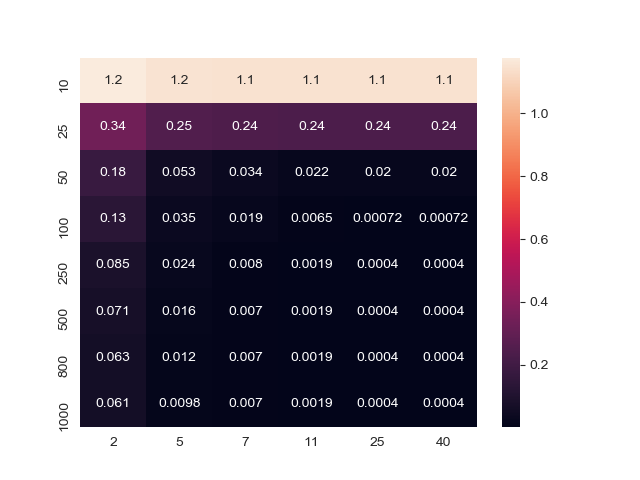

**************************************************test heat map**************************************************


<IPython.core.display.Javascript object>


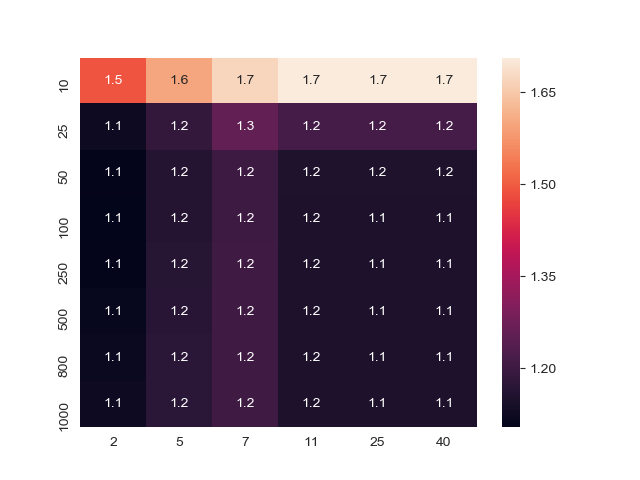

In [19]:
print ('*'*50+'train heat map'+'*'*50)
train_values = pd.DataFrame(data=train_values,index=[10,25,50,100,250,500,800,1000],columns=[2,5,7,11,25,40])
ax = sns.heatmap(train_values,annot=True)
plt.show(ax)
print ('*'*50+'test heat map'+'*'*50)
TEST_values = pd.DataFrame(data=test_values,index=[10,25,50,100,250,500,800,1000],columns=[2,5,7,11,25,40])
ax1 = sns.heatmap(TEST_values,annot=True)
plt.show(ax1)

<h3> 4.4.2 Suprise BaselineModel </h3>
    


In [78]:
from surprise import BaselineOnly 

__Predicted_rating : ( baseline prediction ) __

    -  http://surprise.readthedocs.io/en/stable/basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly 
 >$   \large {\hat{r}_{ui} = b_{ui} =\mu + b_u + b_i} $


- $\pmb \mu $ : Average of all trainings in training data.
- $\pmb b_u$ : User bias
- $\pmb b_i$ : Item bias (movie biases) 

__Optimization function ( Least Squares Problem ) __

    - http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baselines-estimates-configuration 

> $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - (\mu + b_u + b_i)\right)^2 +
\lambda \left(b_u^2 + b_i^2 \right).\text {        [mimimize } {b_u, b_i]}$ 

In [79]:
bsl_options = {'method': 'sgd',
                   'learning_rate': 0.001
                   }
bsl_algo = BaselineOnly(bsl_options=bsl_options)
bsl_algo.fit(trainset)
test_preds = bsl_algo.test(testset)
    # get the predicted ratings from the list of predictions
test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
test_rmse = get_errors(test_preds)


Estimating biases using sgd...


In [83]:
testset = list(zip(df1.user.values, df1.movie.values, df1.rating.values))
testset[:3]

[(510180, 1798, 5), (510180, 2866, 3), (510180, 3730, 4)]

In [32]:
# options are to specify.., how to compute those user and item biases
bsl_options = {'method': 'sgd',
                   'learning_rate': 0.001
                   }
bsl_algo = BaselineOnly(bsl_options=bsl_options)
# run this algorithm.., It will return the train and test results..
bsl_train_rmse, bsl_test_rmse = run_surprise(bsl_algo, trainset, testset, verbose=True)
# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['bsl_algo'] = bsl_train_rmse 
models_evaluation_test['bsl_algo'] = bsl_test_rmse

Estimating biases using sgd...


In [88]:
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

################################################################
# get ''rmse'' and ''mape'' , given list of prediction objecs 
################################################################
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    #mape = np.mean(np.abs(pred - actual)/actual)

    return rmse

#bsl_algo.test(testset)
test_preds = bsl_algo.test(testset)
    # get the predicted ratings from the list of predictions
test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
test_rmse = get_errors(test_preds)
        

In [89]:
test_rmse

0.989313445838195

<h3> 4.4.3 XGBoost with initial 13 features + Surprise Baseline predictor </h3>

__Updating Train Data__

In [37]:
# add our baseline_predicted value as our feature..
bsl_algo.fit(trainset)
train_preds = bsl_algo.test(trainset.build_testset())
# get predicted ratings from the train predictions..
train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    
reg_train['bslpr'] = train_pred_ratings
reg_train.head(2) 

Estimating biases using sgd...


,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,2385553,2,3.597333,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,3.652376
1,1366350,8,3.597333,3.0,5.0,2.0,3.5,3.5,3.0,3.5,3.5,3.5,3.5,3.5,3.5,4,3.586275


__Updating Test Data__

In [38]:
test_preds = bsl_algo.test(testset)
# get the predicted ratings from the list of predictions
test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_df['bslpr']  = test_pred_ratings

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,952748,3,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,4,3.597333
1,1848634,8,3.597333,5.000000,3.000000,2.000000,4.000000,3.500000,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.500000,4,3.590178


In [40]:
# prepare Train data
x_train = reg_train.drop(['user','movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

estimators = [10,25,50,100,250,500,800,1000]
depth = [2,5,7,11,25,40]
# initialize Our first XGBoost model...
train_values = []
test_values=[]
for i in estimators:
    train = []
    test = []
    if (i==100 or i==800):
        print (i)
    for j in depth:
        first_xgb = xgb.XGBRegressor( random_state=15, n_estimators=i,max_depth=j)
        train_rmse, test_rmse = run_xgboost(first_xgb, x_train, y_train, x_test, y_test)
        train.append(train_rmse)
        test.append(test_rmse)
    train_values.append(train)
    test_values.append(test)

100
800


**************************************************train heat map**************************************************


<IPython.core.display.Javascript object>


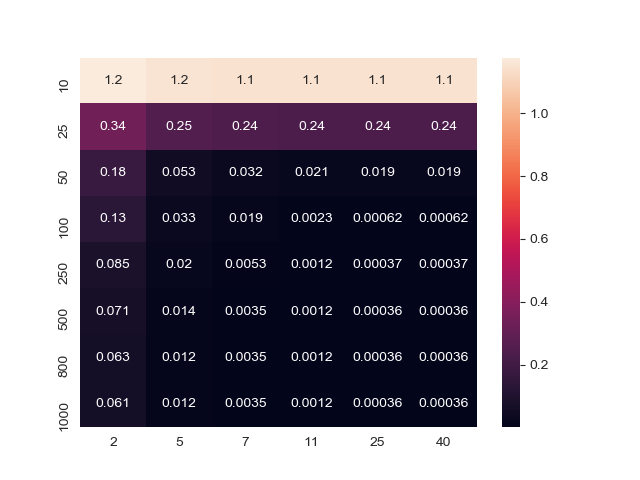

**************************************************test heat map**************************************************


<IPython.core.display.Javascript object>


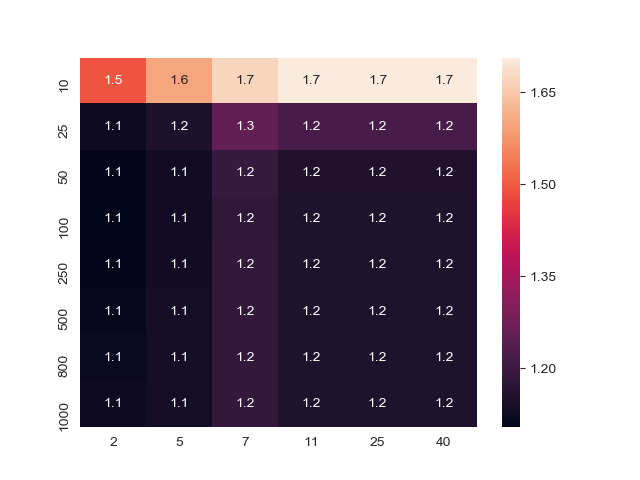

In [41]:
print ('*'*50+'train heat map'+'*'*50)
train_values = pd.DataFrame(data=train_values,index=[10,25,50,100,250,500,800,1000],columns=[2,5,7,11,25,40])
ax = sns.heatmap(train_values,annot=True)
plt.show(ax)
print ('*'*50+'test heat map'+'*'*50)
TEST_values = pd.DataFrame(data=test_values,index=[10,25,50,100,250,500,800,1000],columns=[2,5,7,11,25,40])
ax1 = sns.heatmap(TEST_values,annot=True)
plt.show(ax1)

train_rmse = 0.2499719216343145
test_rmse = 1.1504749229355065


<IPython.core.display.Javascript object>


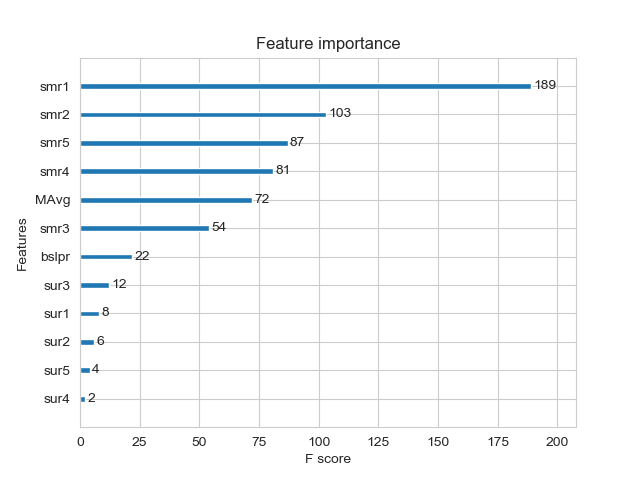

In [44]:
first_xgb = xgb.XGBRegressor( n_estimators=25,max_depth=5)
train_rmse, test_rmse = run_xgboost(first_xgb, x_train, y_train, x_test, y_test)
print ('train_rmse = {}'.format(train_rmse))
print ('test_rmse = {}'.format(test_rmse))
        
xgb.plot_importance(first_xgb)
plt.show()
# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_bsl'] = train_rmse
models_evaluation_test['xgb_bsl'] = test_rmse

<h3> 4.4.4 Surprise KNNBaseline predictor </h3>

In [90]:
from surprise import KNNBaseline

- KNN BASELINE
    - http://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline 

- PEARSON_BASELINE SIMILARITY
    - http://surprise.readthedocs.io/en/stable/similarities.html#surprise.similarities.pearson_baseline 

- SHRINKAGE
    - _2.2 Neighborhood Models_ in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf 

- __predicted Rating__ : ( ___ based on User-User similarity ___ )

\begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - b_{vi})} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)} \end{align}

- $\pmb{b_{ui}}$ -  _Baseline prediction_ of (user,movie) rating

- $ \pmb {N_i^k (u)}$ - Set of __K similar__ users (neighbours) of __user (u)__ who rated __movie(i)__  

- _sim (u, v)_ - __Similarity__ between users __u and v__  
    - Generally, it will be cosine similarity or Pearson correlation coefficient. 
    - But we use __shrunk Pearson-baseline correlation coefficient__, which is based on the pearsonBaseline similarity ( we take base line predictions instead of mean rating of user/item)
       

- __ Predicted rating __ ( based on Item Item similarity ):
 \begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{j \in N^k_u(i)}\text{sim}(i, j) \cdot (r_{uj} - b_{uj})} {\sum\limits_{j \in N^k_u(j)} \text{sim}(i, j)} \end{align}

    -  ___Notations follows same as above (user user based predicted rating ) ___

  <h4> 4.4.4.1 Surprise KNNBaseline with user user similarities</h4>

In [54]:
reg_train1 = reg_train.loc[0:15000]

In [55]:
reg_train1.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,2385553,2,3.597333,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,3.652376
1,1366350,8,3.597333,3.0,5.0,2.0,3.5,3.5,3.0,3.5,3.5,3.5,3.5,3.5,3.5,4,3.586275
2,1602857,8,3.597333,3.0,5.0,4.0,3.5,3.5,3.0,2.5,2.5,2.5,2.5,2.5,3.5,2,3.608656
3,2530578,8,3.597333,5.0,4.0,2.0,3.5,3.5,3.0,3.0,3.0,3.0,3.0,3.0,3.5,3,3.547174
4,2538611,8,3.597333,5.0,4.0,2.0,3.5,3.5,5.0,5.0,5.0,5.0,5.0,5.0,3.5,5,3.559018


In [56]:
# It is to specify how to read the dataframe.
# for our dataframe, we don't have to specify anything extra..
reader = Reader(rating_scale=(1,5))

# create the traindata from the dataframe...
train_data = Dataset.load_from_df(reg_train1[['user', 'movie', 'rating']], reader)

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset1 = train_data.build_full_trainset() 

In [91]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 50,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'} 
knn_bsl_u = KNNBaseline(k=5, sim_options = sim_options, bsl_options = bsl_options)
knn_bsl_u.fit(trainset)
test_preds = bsl_algo.test(testset)
    # get the predicted ratings from the list of predictions
test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
test_rmse = get_errors(test_preds)
test_rmse
#knn_bsl_u_train_rmse, knn_bsl_u_test_rmse = run_surprise(knn_bsl_u, trainset1, testset, verbose=True)

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.989313445838195

In [61]:
# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_rmse 
models_evaluation_test['knn_bsl_u'] = knn_bsl_u_test_rmse


<h4> 4.4.4.2 Surprise KNNBaseline with movie movie similarities</h4>

In [92]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm

# 'user_based' : Fals => this considers the similarities of movies instead of users

sim_options = {'user_based' : False,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'}


knn_bsl_m = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)

#knn_bsl_m_train_rmse, knn_bsl_m_test_rmse = run_surprise(knn_bsl_m, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
#models_evaluation_train['knn_bsl_m'] = knn_bsl_m_train_rmse 
#models_evaluation_test['knn_bsl_m'] = knn_bsl_m_test_rmse
knn_bsl_m.fit(trainset)
test_preds = bsl_algo.test(testset)
    # get the predicted ratings from the list of predictions
test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
test_rmse = get_errors(test_preds)
test_rmse


Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.989313445838195

<h3> 4.4.5 XGBoost with initial 13 features + Surprise Baseline predictor + KNNBaseline predictor </h3>

- - - First we will run XGBoost with predictions from both KNN's ( that uses User\_User and Item\_Item similarities along with our previous features.

 
- - - Then we will run XGBoost with just predictions form both knn models and preditions from our baseline model. 

__Preparing Train data __

In [70]:
# add the predicted values from both knns to this dataframe
bsl_algo.fit(trainset1)
train_preds_user = knn_bsl_u.test(trainset1.build_testset())
train_preds_movie = knn_bsl_m.test(trainset1.build_testset())
# get predicted ratings from the train predictions..
train_actual_ratings_user, train_pred_ratings_user = get_ratings(train_preds_user)
train_actual_ratings_movie, train_pred_ratings_movie = get_ratings(train_preds_movie)

reg_train1['knn_bsl_u'] = train_pred_ratings_user
reg_train1['knn_bsl_m'] = train_pred_ratings_movie

reg_train1.head(2)

Estimating biases using sgd...


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x0000006C340445F8>>
Traceback (most recent call last):
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\xgboost\core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,2385553,2,3.597333,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,3.652376,5.0,5.0
1,1366350,8,3.597333,3.0,5.0,2.0,3.5,3.5,3.0,3.5,3.5,3.5,3.5,3.5,3.5,4,3.586275,4.0,4.0


__Preparing Test data  __

In [71]:
test_preds_user = knn_bsl_u.test(testset)
# get the predicted ratings from the list of predictions
test_actual_ratings, test_pred_ratings_user = get_ratings(test_preds_user)
test_preds_movie = knn_bsl_m.test(testset)
# get the predicted ratings from the list of predictions
test_actual_ratings, test_pred_ratings_movie = get_ratings(test_preds_movie)

reg_test_df['knn_bsl_u'] = test_pred_ratings_user
reg_test_df['knn_bsl_m'] = test_pred_ratings_movie

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,952748,3,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,4,3.597333,3.599360,3.597333
1,1848634,8,3.597333,5.000000,3.000000,2.000000,4.000000,3.500000,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.500000,4,3.590178,3.568848,3.572101


In [72]:
# prepare the train data....
x_train = reg_train1.drop(['user', 'movie', 'rating'], axis=1)
y_train = reg_train1['rating']

# prepare the train data....
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']
estimators = [10,25,50,100,150,250,400,500]
depth = [2,5,7,11,17,25,35]
# initialize Our first XGBoost model...
train_values = []
test_values=[]
for i in estimators:
    train = []
    test = []
    if (i==100 or i==400):
        print (i)
    for j in depth:
        xgb_knn_bsl = xgb.XGBRegressor( random_state=15, n_estimators=i,max_depth=j)
        train_rmse, test_rmse = run_xgboost(xgb_knn_bsl, x_train, y_train, x_test, y_test)
        train.append(train_rmse)
        test.append(test_rmse)
    train_values.append(train)
    test_values.append(test)

100
400


**************************************************train heat map**************************************************


<IPython.core.display.Javascript object>


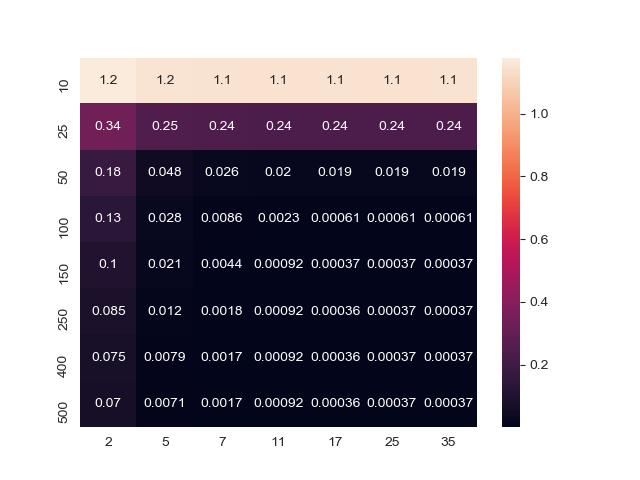

**************************************************test heat map**************************************************


<IPython.core.display.Javascript object>


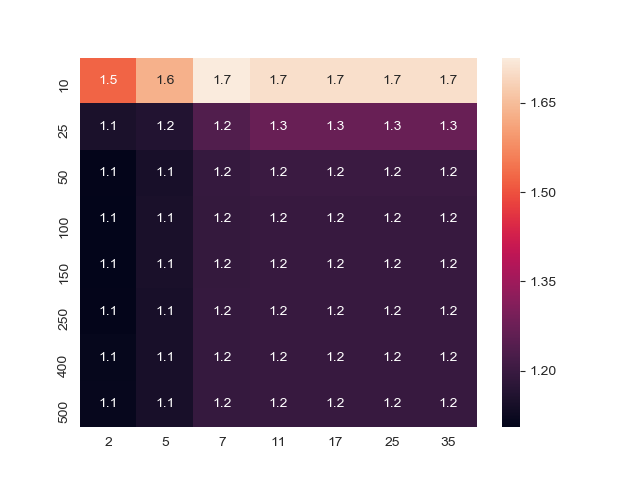

In [73]:
print ('*'*50+'train heat map'+'*'*50)
train_values = pd.DataFrame(data=train_values,index=estimators,columns=depth)
ax = sns.heatmap(train_values,annot=True)
plt.show(ax)
print ('*'*50+'test heat map'+'*'*50)
TEST_values = pd.DataFrame(data=test_values,index=estimators,columns=depth)
ax1 = sns.heatmap(TEST_values,annot=True)
plt.show(ax1)

<IPython.core.display.Javascript object>


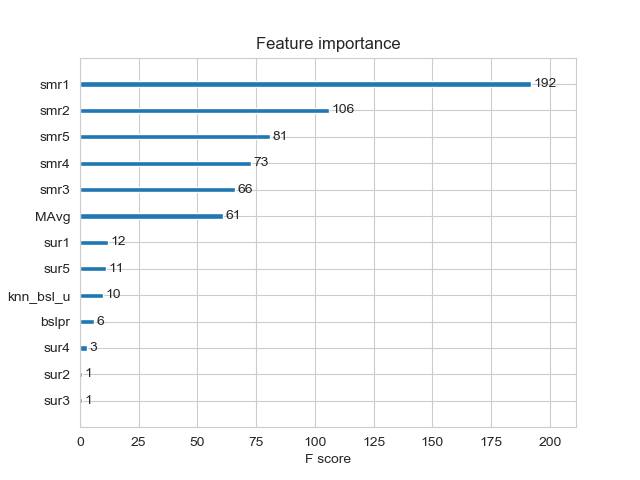

In [74]:
xgb_knn_bsl = xgb.XGBRegressor( random_state=15, n_estimators=25,max_depth=5)
train_rmse, test_rmse = run_xgboost(xgb_knn_bsl, x_train, y_train, x_test, y_test)
# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_knn_bsl'] = train_rmse
models_evaluation_test['xgb_knn_bsl'] = test_rmse
        
xgb.plot_importance(xgb_knn_bsl)
plt.show()

<h3> 4.4.6 Matrix Factorization Techniques </h3>

<h4> 4.4.6.1 SVD Matrix Factorization User Movie intractions </h4>

In [93]:
from surprise import SVD

http://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD 

- __ Predicted Rating : __
    - 
    - $ \large  \hat r_{ui} = \mu + b_u + b_i + q_i^Tp_u $
    
        - $\pmb q_i$ - Representation of item(movie) in latent factor space
        
        - $\pmb p_u$ - Representation of user in new latent factor space
        


- A BASIC MATRIX FACTORIZATION MODEL in  https://datajobs.com/data-science-repo/Recommender-Systems-[Netflix].pdf

- __Optimization problem with user item interactions and regularization (to avoid overfitting)__
    - 
    - $\large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2\right) $

In [94]:
# initiallize the model
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
#svd_train_results, svd_test_results = run_surprise(svd, trainset1, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
#models_evaluation_train['svd'] = svd_train_results 
#models_evaluation_test['svd'] = svd_test_results
svd.fit(trainset)
test_preds = bsl_algo.test(testset)
    # get the predicted ratings from the list of predictions
test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
test_rmse = get_errors(test_preds)
print (test_rmse)


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
0.989313445838195


  <h4> 4.4.6.2 SVD Matrix Factorization with implicit feedback from user ( user rated movies ) </h4>

In [95]:
from surprise import SVDpp

- ----->  2.5 Implicit Feedback in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf

- __ Predicted Rating : __
    - 
    - $ \large \hat{r}_{ui} = \mu + b_u + b_i + q_i^T\left(p_u +
    |I_u|^{-\frac{1}{2}} \sum_{j \in I_u}y_j\right) $ 

 - $ \pmb{I_u}$ --- the set of all items rated by user u

- $\pmb{y_j}$ --- Our new set of item factors that capture implicit ratings.  

- __Optimization problem with user item interactions and regularization (to avoid overfitting)__
    - 
    - $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2 + ||y_j||^2\right) $ 

In [86]:
# initiallize the model
svdpp = SVD(n_factors=50, random_state=15, verbose=True)
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset1, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svdpp'] = svdpp_train_results 
models_evaluation_test['svdpp'] = svdpp_test_results


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


<h3> 4.4.7 XgBoost with 13 features + Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

__Preparing Train data__

In [88]:
# add the predicted values from both knns to this dataframe
reg_train1 = reg_train1.copy()
reg_train1['svd'] = models_evaluation_train['svd']['predictions']
reg_train1['svdpp'] = models_evaluation_train['svdpp']['predictions']

reg_train1.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,2385553,2,3.597333,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5,3.652376,5.0,5.0,4.142122,4.004252
1,1366350,8,3.597333,3.0,5.0,2.0,3.5,3.5,3.0,3.5,...,3.5,3.5,3.5,3.5,4,3.586275,4.0,4.0,3.706182,3.661093


__Preparing Test data  __

In [89]:
reg_test_df['svd'] = models_evaluation_test['svd']['predictions']
reg_test_df['svdpp'] = models_evaluation_test['svdpp']['predictions']

reg_test_df.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,952748,3,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,3.597333,...,3.597333,3.597333,3.597333,3.597333,4,3.597333,3.599360,3.597333,3.599360,3.59936
1,1848634,8,3.597333,5.000000,3.000000,2.000000,4.000000,3.500000,3.597333,3.597333,...,3.597333,3.597333,3.597333,3.500000,4,3.590178,3.568848,3.572101,3.590526,3.55382


In [98]:
# prepare the train data....
x_train = reg_train1.drop(['user', 'movie', 'rating'], axis=1)
y_train = reg_train1['rating']

# prepare the train data....
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']
estimators = [10,25,50,100,150,250,400,500]
depth = [2,5,7,11,17,25,35]
# initialize Our first XGBoost model...
train_values = []
test_values=[]
for i in estimators:
    train = []
    test = []
    if (i==100 or i==400):
        print (i)
    for j in depth:
        xgb_final = xgb.XGBRegressor( random_state=15, n_estimators=i,max_depth=j)
        train_rmse, test_rmse = run_xgboost(xgb_final, x_train, y_train, x_test, y_test)
        train.append(train_rmse)
        test.append(test_rmse)
    train_values.append(train)
    test_values.append(test)

100
400


**************************************************train heat map**************************************************


<IPython.core.display.Javascript object>


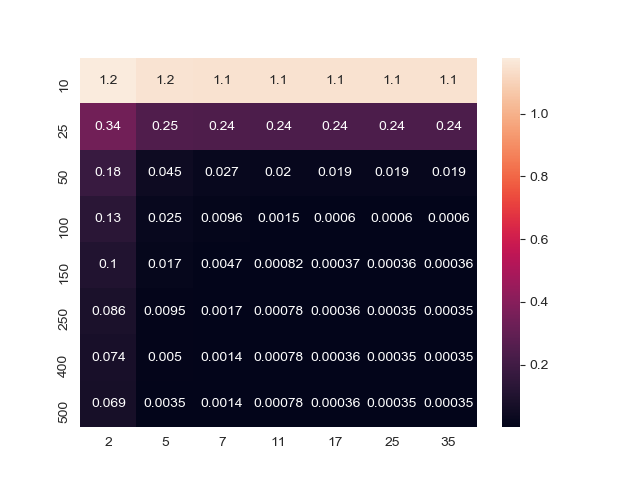

**************************************************test heat map**************************************************


<IPython.core.display.Javascript object>


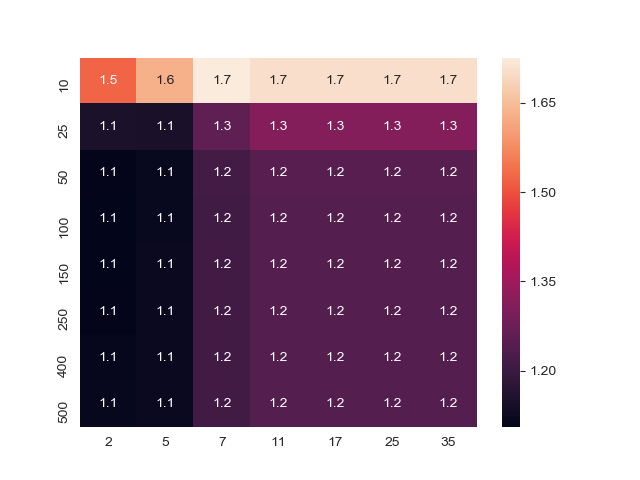

In [99]:
print ('*'*50+'train heat map'+'*'*50)
train_values = pd.DataFrame(data=train_values,index=estimators,columns=depth)
ax = sns.heatmap(train_values,annot=True)
plt.show(ax)
print ('*'*50+'test heat map'+'*'*50)
TEST_values = pd.DataFrame(data=test_values,index=estimators,columns=depth)
ax1 = sns.heatmap(TEST_values,annot=True)
plt.show(ax1)

In [100]:
xgb_final = xgb.XGBRegressor( random_state=15, n_estimators=10,max_depth=5)
train_rmse, test_rmse = run_xgboost(xgb_final, x_train, y_train, x_test, y_test)  

<IPython.core.display.Javascript object>


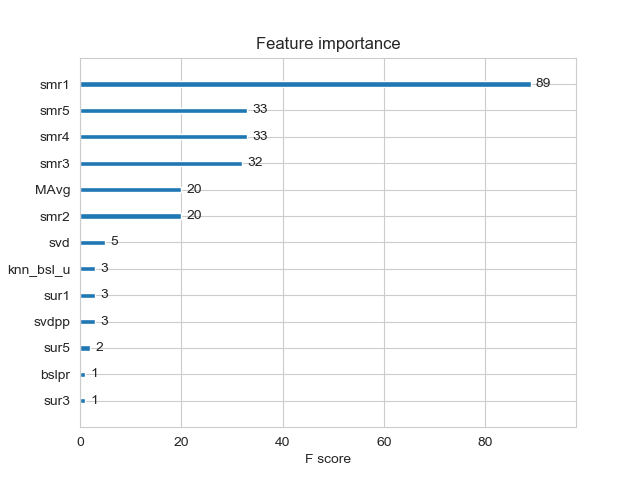

In [101]:
# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_final'] = train_rmse
models_evaluation_test['xgb_final'] = test_rmse
xgb.plot_importance(xgb_final)
plt.show()

<h3> 4.4.8 XgBoost with Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

In [102]:
# prepare train data
x_train = reg_train1[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_train = reg_train1['rating']

# test data
x_test = reg_test_df[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_test = reg_test_df['rating']

estimators = [10,25,50,100,150,250,400,500]
depth = [2,5,7,11,17,25,35]
# initialize Our first XGBoost model...
train_values = []
test_values=[]
for i in estimators:
    train = []
    test = []
    if (i==100 or i==400):
        print (i)
    for j in depth:
        xgb_all_models = xgb.XGBRegressor( random_state=15, n_estimators=i,max_depth=j)
        train_rmse, test_rmse = run_xgboost(xgb_all_models, x_train, y_train, x_test, y_test)
        train.append(train_rmse)
        test.append(test_rmse)
    train_values.append(train)
    test_values.append(test)


100
400


**************************************************train heat map**************************************************


<IPython.core.display.Javascript object>


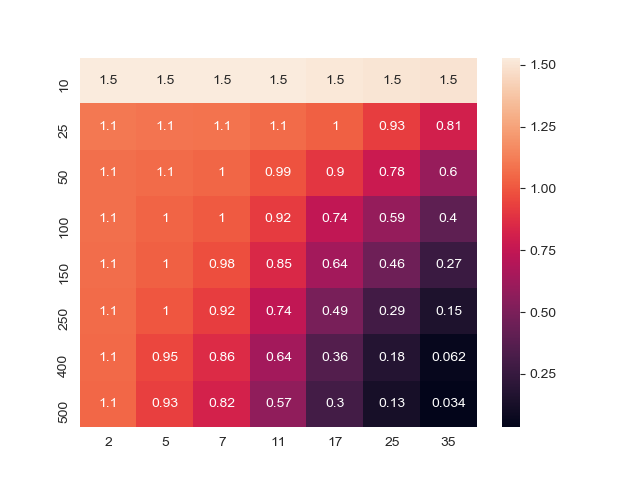

**************************************************test heat map**************************************************


<IPython.core.display.Javascript object>


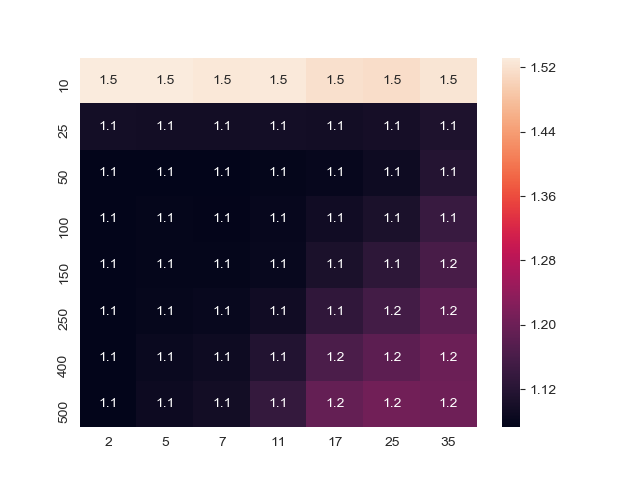

In [103]:
print ('*'*50+'train heat map'+'*'*50)
train_values = pd.DataFrame(data=train_values,index=estimators,columns=depth)
ax = sns.heatmap(train_values,annot=True)
plt.show(ax)
print ('*'*50+'test heat map'+'*'*50)
TEST_values = pd.DataFrame(data=test_values,index=estimators,columns=depth)
ax1 = sns.heatmap(TEST_values,annot=True)
plt.show(ax1)

<IPython.core.display.Javascript object>


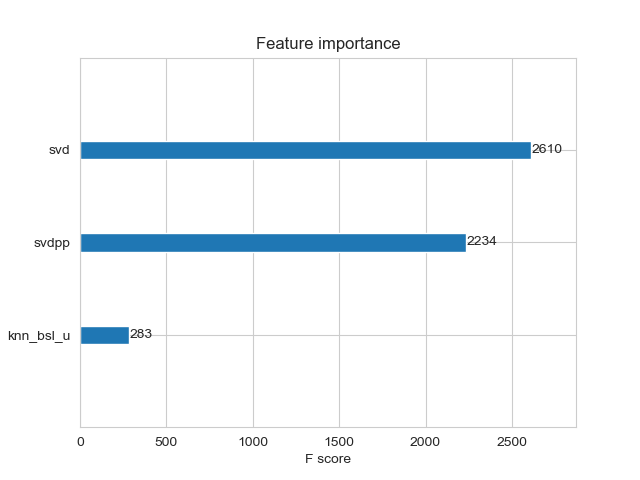

In [104]:
xgb_all_models = xgb.XGBRegressor( random_state=15, n_estimators=100,max_depth=7)
train_rmse, test_rmse = run_xgboost(xgb_all_models, x_train, y_train, x_test, y_test)
# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_all_models'] = train_rmse
models_evaluation_test['xgb_all_models'] = test_rmse

xgb.plot_importance(xgb_all_models)
plt.show()

<h2> 4.5 Comparision between all models </h2>

In [108]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ['featurization','rmse']
x.add_row(['first_algo','1.2'])
x.add_row(['bsl_algo','1.0468'])
x.add_row(['knn_bsl_m','1.0283'])
x.add_row(['knn_bsl_u','1.0484'])
x.add_row(['xgb_knn_bsl','1.1615'])
x.add_row(['xgb_final','1.6318'])
x.add_row(['svd','1.04887'])
x.add_row(['svdpp','1.0486'])
x.add_row(['xgb_all_models','1.0766'])

print (x)

+----------------+---------+
| featurization  |   rmse  |
+----------------+---------+
|   first_algo   |   1.2   |
|    bsl_algo    |  1.0468 |
|   knn_bsl_m    |  1.0283 |
|   knn_bsl_u    |  1.0484 |
|  xgb_knn_bsl   |  1.1615 |
|   xgb_final    |  1.6318 |
|      svd       | 1.04887 |
|     svdpp      |  1.0486 |
| xgb_all_models |  1.0766 |
+----------------+---------+


#  5) CONCLUSIONS

all models have close rmse but there is uge difference between train and test rmse except for xgb_all_models